# Markdown Dataset Initial Deepdive

## Import Libraries

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
py_path = os.path.join(os.path.dirname(os.getcwd()),"markdown_predictions")
sys.path.insert(0,py_path)
import parse_data as par

## Import Dataset

In [2]:
df = par.LoadSalesData.load_in_files(os.path.join(os.path.dirname(os.getcwd()),"raw_data")).sales_data
df = df[~df["reference_PRE"].isnull()] # remove totals (temp fix)

In [3]:
# manufacture target sales (temp solution)
for col in ["quantity_sold_POST", "quantity_sold_sub1_POST"]:
    df[col] = df[col].apply(lambda n: n.replace("-","0") if n == "-" else n)
    df[col] = df[col].apply(lambda n: n.replace(",",""))
    df[col] = df[col].apply(lambda n: float(n.replace("%",""))/100 if "%" in n else float(n))
df["2week_sales"] = df["quantity_sold_POST"] + df["quantity_sold_sub1_POST"]
df.head()

,reference_PRE,seasonality_PRE,price_PRE,weekly_rank_PRE,turnover_PRE,turnover_w_sub1_PRE,turnover_w_sub2_PRE,turnover_w_sub3_PRE,quantity_sold_PRE,quantity_sold_sub1_PRE,quantity_sold_sub2_PRE,quantity_sold_sub3_PRE,discount_rate_PRE,discount_rate_sub1_PRE,store_stock_PRE,stock_transit_PRE,total_store_stock_PRE,weekly_cover_PRE,cum_turnover_PRE,cum_discount_rate_PRE,cum_quantity_sold_PRE,num_sizes_PRE,num_stores_PRE,first_week_sale_PRE,rate_of_sale_PRE,cum_sellthrough_PRE,warehouse_stock_PRE,zero_stock_PRE,avail_warehouse_stock_PRE,markdown_applied_PRE,season_PRE,delivery_POST,window_display_POST,target_POST,gender_POST,product_category_POST,family_POST,sub_family_POST,macro_category_POST,reference_name_POST,reference_POST,description_POST,color_POST,material_POST,seasonality_POST,price_POST,weekly_rank_POST,turnover_POST,sub_target_POST,turnover_w_sub1_POST,turnover_w_sub2_POST,turnover_w_sub3_POST,quantity_sold_POST,quantity_sold_sub1_POST,quantity_sold_sub2_POST,quantity_sold_sub3_POST,discount_rate_POST,discount_rate_sub1_POST,store_stock_POST,stock_transit_POST,total_store_stock_POST,weekly_cover_POST,cum_turnover_POST,cum_discount_rate_POST,cum_quantity_sold_POST,num_sizes_POST,num_stores_POST,first_week_sale_POST,rate_of_sale_POST,cum_sellthrough_POST,warehouse_stock_POST,zero_stock_POST,avail_warehouse_stock_POST,markdown_applied_POST,2week_sales
0,5246101.0,Reconduit,139,1.0,"28,065 €","24,321 €","21,299 €","10,975 €",207,176,156,80,2.46 %,0.50 %,"1,489",6,"1,495",7,"372,725 €",2.56 %,"2,752",7,135,2019-S28,0.85,64 %,"3,442",0,"3,438",0%,AW19,PERM SELECTIF EARLY SEASON,PERM S VET EARLY ADF_JOUR PERM,3-ADULTE,FE,JOUR,FA GROSSES PIECES VET,"CIRES, COUPE VENT VET",Adulte Jour,CIRE,5246101.0,CIRE JAUNE,JAUNE,Autres,Reconduit,139,1168.0,0 €,FEMME,0 €,"2,203 €","8,566 €",0.0,0.0,16,62,-,-,0,0,0,-,"408,471 €",2.44 %,"3,012",7,137,2019-S28,0.76,98 %,0,0,0,0%,0.0
1,5246102.0,Reconduit,139,2.0,"25,700 €","17,637 €","17,822 €","9,865 €",189,128,130,72,2.18 %,0.59 %,"1,430",12,"1,442",8,"357,185 €",2.85 %,"2,645",7,136,2019-S28,0.81,64 %,"3,403",0,"3,403",0%,AW19,PERM SELECTIF EARLY SEASON,PERM S VET EARLY ADF_JOUR PERM,3-ADULTE,FE,JOUR,FA GROSSES PIECES VET,"CIRES, COUPE VENT VET",Adulte Jour,CIRE,5246102.0,CIRE SMOKIN,SMOKIN,Autres,Reconduit,139,1168.0,0 €,FEMME,0 €,"1,327 €","13,937 €",0.0,0.0,10,102,-,-,0,0,0,-,"396,043 €",2.76 %,"2,930",7,136,2019-S28,0.74,99 %,0,0,0,0%,0.0
2,5225401.0,Reconduit,"39,9",3.0,"21,509 €","10,581 €","10,456 €","8,949 €",691,265,251,216,27.38 %,2.67 %,"2,053",48,"2,101",3,"218,509 €",9.95 %,"5,685",8,169,2019-S28,1.40,73 %,"2,225",0,"2,195",0%,AW19,AH2019 SELECTIF PREVIEW,19 S VET N-SV_PARIS,2-ENFANT,FE,NUIT,FA PYJAMAS VET,SF PYJALONG,Enfant Nuit,COPARIS,5225401.0,PYJAMA MAR/TE,MAR/TE,Jersey,Reconduit,"39,9",1168.0,0 €,PETIT,0 €,"1,644 €","7,501 €",0.0,0.0,40,181,-,-,0,0,0,-,"239,291 €",9.51 %,"6,196",8,169,2019-S28,1.26,100 %,0,0,0,0%,0.0
3,4958901.0,Hiver,"49,9",4.0,"16,928 €","11,319 €","10,551 €","9,531 €",424,233,208,191,24.24 %,4.00 %,872,34,906,2,"132,469 €",13.13 %,"2,901",7,170,2019-S35,1.00,77 %,36,0,0,20%,AW19,AH2019 SELECTIF HIGH SEASON,19 S VET HIGH JRENF_ICED WINTE,2-ENFANT,FE,JOUR,FA ROBES VET,ROBES ML VET,Enfant Jour,CORAIL,4958901.0,ROBE ML SMO/MU,SMO/MU,Molleton,Hiver,"49,9",392.0,"3,558 €",PETIT,"5,267 €","5,244 €","6,008 €",150.0,174.0,127,135,55.53 %,48.88 %,197,40,237,1,"160,366 €",16.45 %,"3,647",7,170,2019-S35,0.98,95 %,0,0,0,20%,324.0
4,5105201.0,Hiver,"39,9",5.0,"15,969 €","10,996 €","16,172 €","18,558 €",470,265,389,440,21.46 %,1.85 %,"1,444",21,"1,465",3,"90,431 €",6.69 %,"2,255",8,169,2019-S43,0.95,61 %,60,0,46,20%,AW19,AH2019 SELECTIF HIGH SEASON,19 S VET HIGH N-SV_FESTIVE SEA,2-ENFANT,MA,NUIT,FA PYJAMAS VET,SF PYJALONG,Enfant Nuit,CHATEAU,5105201.0,PYJAMA MAR/MU,MAR/MU,Bouclette velours,Hiver,"39,9",244.0,"4,989 €",PETIT,"6,524 €","7,384 €","7,441 €",163.0,195.0,216,203,28.44 %,26.37 %,529,13,542,3,"125,318 €",10.22 %,"3,248",8,169,2019-S43,1.01,86 %,0,0,0,20%,358.0

## Explore Potential Targets

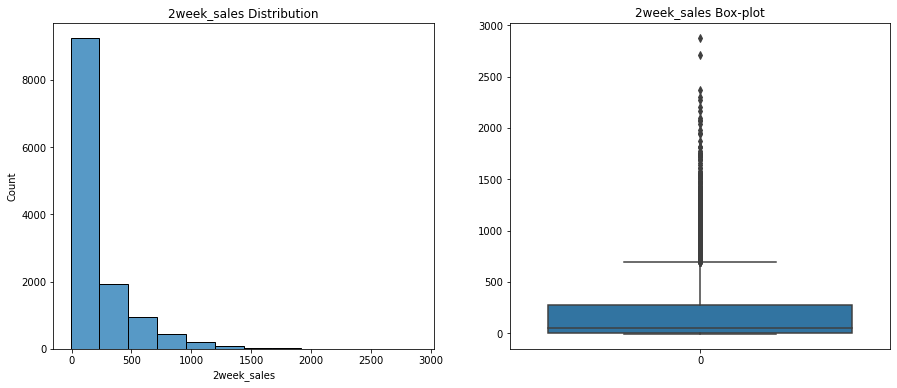

sales < 0: 0.26%
sales = 0: 32.58%
low outliers: 0
high outliers: 859


In [4]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.histplot(data=df["2week_sales"], ax=ax[0], bins = 12)
ax[0].set_title("2week_sales Distribution")
sns.boxplot(data=df["2week_sales"], ax=ax[1])
ax[1].set_title("2week_sales Box-plot")

plt.show()

neg_sales_percent = str(round(df["2week_sales"].sort_values()[df["2week_sales"] < 0].count() / len(df) * 100,2)) + "%"
print("sales < 0:", neg_sales_percent)
zero_sales_percent = str(round(df["2week_sales"].sort_values()[df["2week_sales"] == 0].count() / len(df) * 100,2)) + "%"
print("sales = 0:", zero_sales_percent)
Q1 = df[["2week_sales"]].quantile(0.25)[0]
Q3 = df[["2week_sales"]].quantile(0.75)[0]
IQR = Q3 - Q1
low_liers = df[["2week_sales"]][df["2week_sales"] < Q1 - 1.5 * IQR].count()[0]
print("low outliers:", low_liers)
high_liers = df[["2week_sales"]][df["2week_sales"] > Q3 + 1.5 * IQR].count()[0]
print("high outliers:", high_liers)


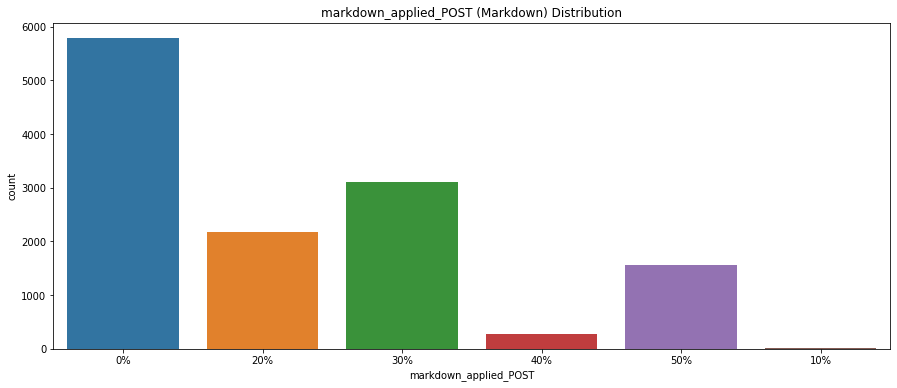

In [5]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x=df["markdown_applied_POST"], ax=ax)
ax.set_title("markdown_applied_POST (Markdown) Distribution")

plt.show()

## Date Fields

In [6]:
dates = ["first_week_sale_POST"]

In [7]:
today = datetime.today()
df_dt_tmp = df[df["first_week_sale_POST"]!="-"].copy()
df["weeks_plus"] = df_dt_tmp["first_week_sale_POST"].apply(lambda dt: timedelta(weeks=int(dt[-2:])))
df_dt_tmp["first_week_sale_POST"] = df_dt_tmp["first_week_sale_POST"].apply(
                            lambda dt: datetime.strptime(dt.replace("S",""),"%Y-%U")) + df["weeks_plus"]
df_dt_tmp["weeks_since_first_sale"] = today - df_dt_tmp["first_week_sale_POST"]
df_dt_tmp["weeks_since_first_sale"] = df_dt_tmp["weeks_since_first_sale"].apply(lambda d: d.days) / 7

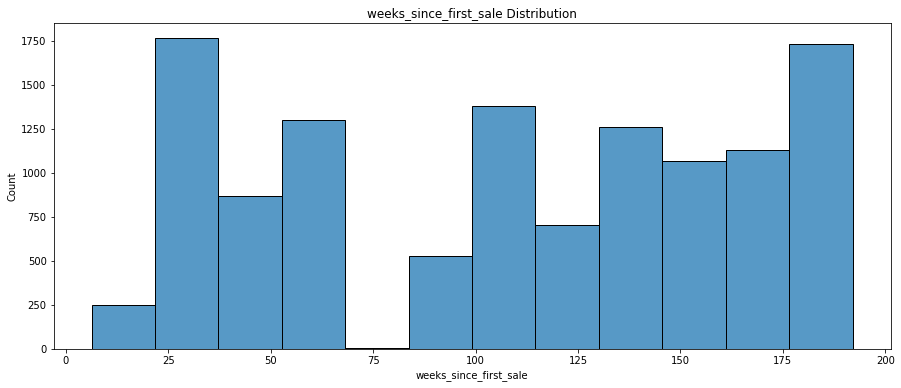

In [8]:
fig, ax = plt.subplots(figsize=(15,6))

sns.histplot(data=df_dt_tmp["weeks_since_first_sale"], ax=ax, bins = 12)
ax.set_title("weeks_since_first_sale Distribution")

plt.show()

## Categoric Fields

In [9]:
categories = ['delivery_POST',
 'target_POST',
 'sub_target_POST',
 'gender_POST',
 'product_category_POST',
 'family_POST',
 'sub_family_POST',
 'macro_category_POST',
 'color_POST', # colour seems important but would need serious bucketing
 'material_POST', # same for material / fabric
 'seasonality_POST']
# dropped free text fields: description, reference, window display, and reference name
# dropped season because it is not forward looking

In [10]:
df_cats = df[categories].copy()

In [11]:
df_cats.nunique()

delivery_POST             76
target_POST                4
sub_target_POST            6
gender_POST                3
product_category_POST      7
family_POST               76
sub_family_POST          182
macro_category_POST       10
color_POST               693
material_POST             93
seasonality_POST           4
dtype: int64

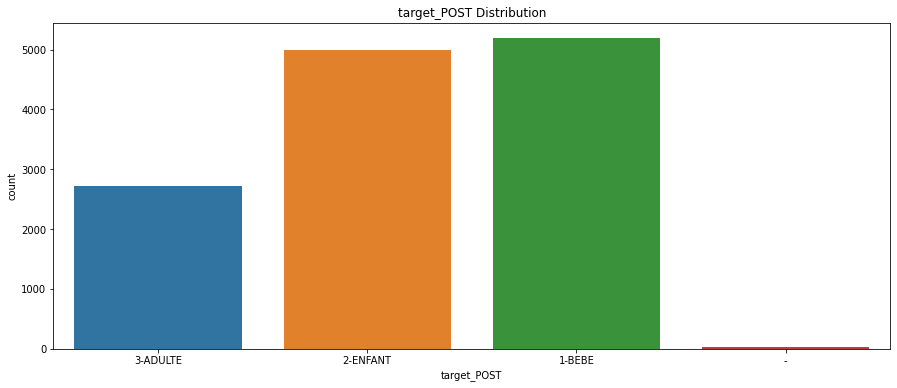

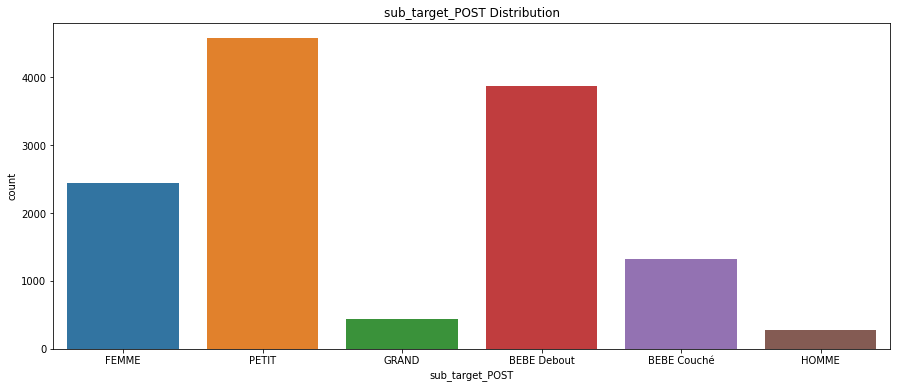

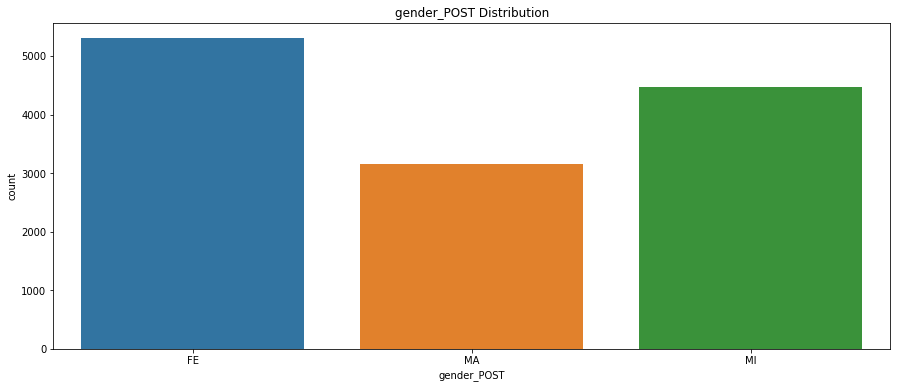

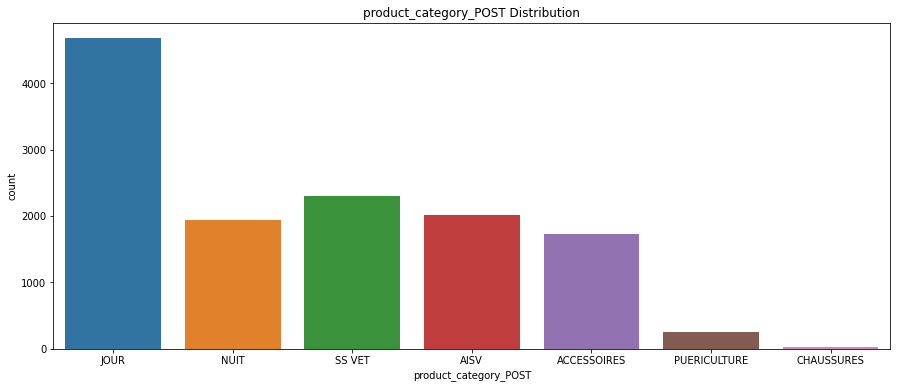

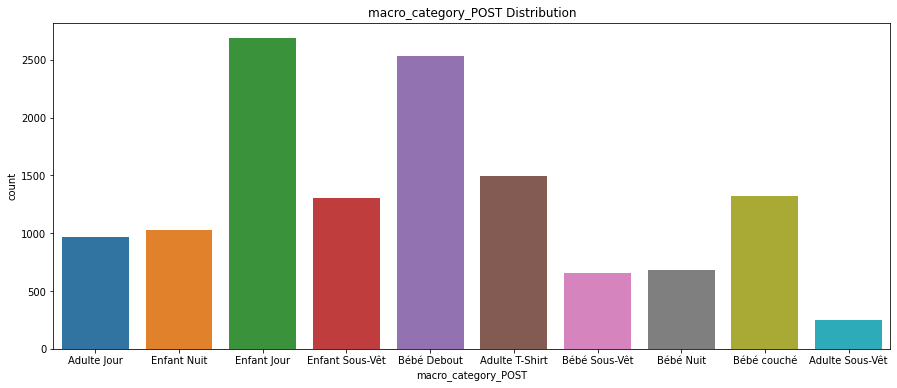

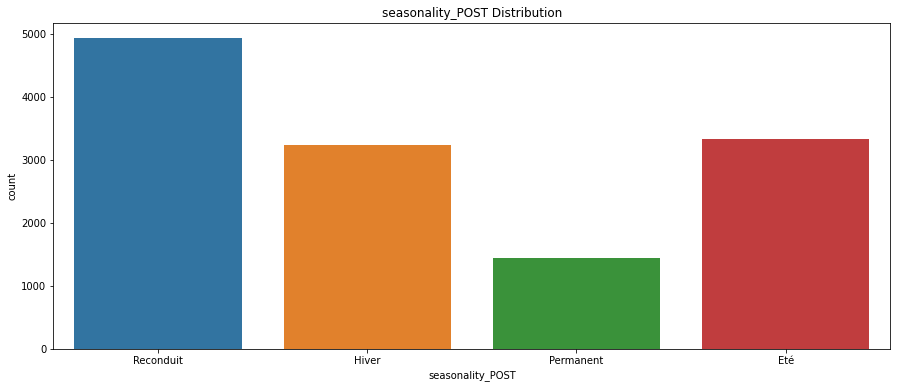

Not Run (categories > 10): delivery_POST, family_POST, sub_family_POST, color_POST, material_POST


In [12]:
not_run = []
for col in df_cats.columns:
    if df_cats.nunique()[col] < 11:
        fig, ax = plt.subplots(figsize=(15,6))
        sns.countplot(x=df_cats[col], ax=ax)
        ax.set_title(f"{col} Distribution")
        plt.show()
    else:
        not_run.append(col)
not_run = ", ".join(not_run)
print("Not Run (categories > 10): " + not_run)

## Numeric Fields

In [13]:
numerics = ['price_POST',
 'weekly_rank_POST',
 'turnover_w_sub2_POST',
 'turnover_w_sub3_POST',
 'quantity_sold_sub2_POST',
 'quantity_sold_sub3_POST',
 'discount_rate_POST',
 'discount_rate_sub1_POST',
 'store_stock_POST',
 'stock_transit_POST',
 'total_store_stock_POST',
 'weekly_cover_POST',
 'cum_turnover_POST',
 'cum_discount_rate_POST',
 'cum_quantity_sold_POST',
 'num_sizes_POST',
 'num_stores_POST',
 'rate_of_sale_POST',
 'cum_sellthrough_POST',
 'warehouse_stock_POST',
 'avail_warehouse_stock_POST']
# zero_stock_POST removed due to being all hyphens

### Price (Special Formatting Case)

In [14]:
df_num_temp = df[numerics].copy()
df_num_temp["price_POST"] = df["price_POST"].apply(
    lambda n: n.replace(",","").replace("Inconnu","nan").replace("-","0")).astype(float)

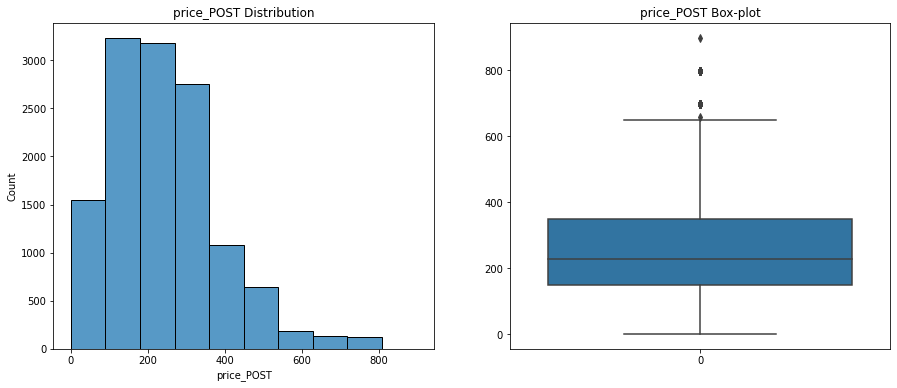

price < 0: 0.0%
price = 0: 0.51%
low outliers: 0
high outliers: 247


In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.histplot(data=df_num_temp["price_POST"], ax=ax[0], bins = 10)
ax[0].set_title("price_POST Distribution")
sns.boxplot(data=df_num_temp["price_POST"], ax=ax[1])
ax[1].set_title("price_POST Box-plot")


plt.show()

neg_price_percent = str(round(df_num_temp["price_POST"][df_num_temp["price_POST"] < 0].count() / len(df) * 100,2)) + "%"
print("price < 0:", neg_price_percent)
zero_price_percent = str(round(df_num_temp["price_POST"][df_num_temp["price_POST"] == 0].count() / len(df) * 100,2)) + "%"
print("price = 0:", zero_price_percent)
Q1 = df_num_temp[["price_POST"]].quantile(0.25)[0]
Q3 = df_num_temp[["price_POST"]].quantile(0.75)[0]
IQR = Q3 - Q1
low_liers = df_num_temp[["price_POST"]][df_num_temp["price_POST"] < Q1 - 1.5 * IQR].count()[0]
print("low outliers:", low_liers)
high_liers = df_num_temp[["price_POST"]][df_num_temp["price_POST"] > Q3 + 1.5 * IQR].count()[0]
print("high outliers:", high_liers)

### All Other Numerics

In [16]:
# loop thorugh and clean all remaining numeric fields
exclude_chars = [" ", ",", "$", "£", "€"]
for col in numerics[1:]:
    df_num_temp[col] = df_num_temp[col].astype(str).apply(lambda n: n.replace("-", "0") if n == "-" else n)
    for char in exclude_chars:
        df_num_temp[col] = df_num_temp[col].apply(lambda n: n.replace(char, ""))
    df_num_temp[col] = df_num_temp[col].apply(lambda n: str(float(n.replace("%", ""))/100) if "%"  in n else n)
    df_num_temp[col] = df_num_temp[col].astype(float)

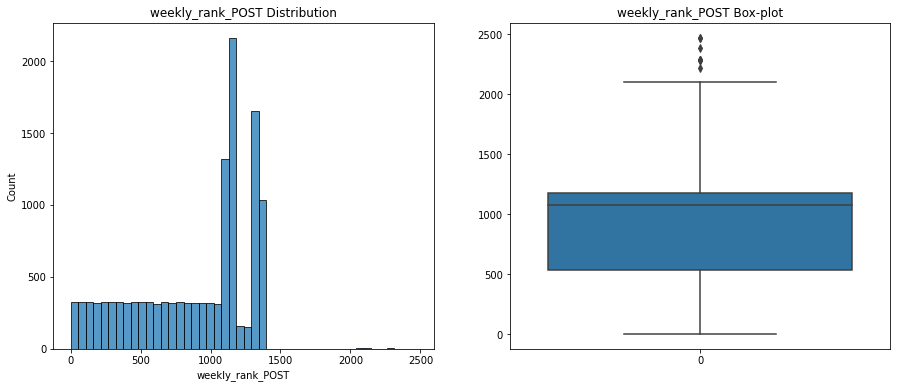

weekly_rank_POST < 0: 0.0%
weekly_rank_POST = 0: 0.0%
low outliers: 0
high outliers: 9


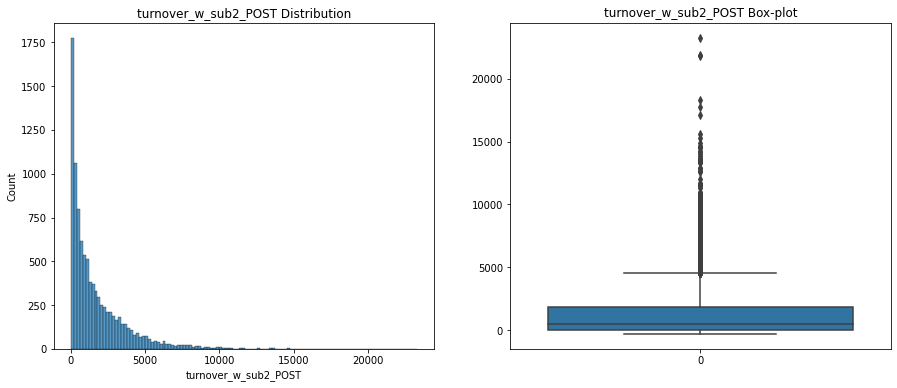

turnover_w_sub2_POST < 0: 0.77%
turnover_w_sub2_POST = 0: 24.63%
low outliers: 0
high outliers: 850


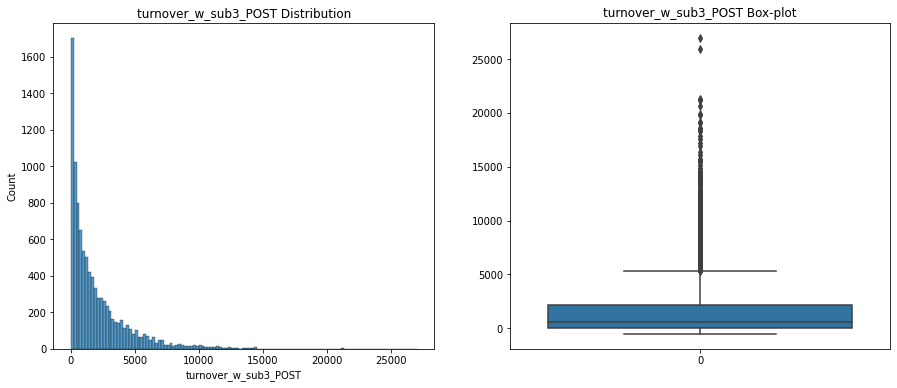

turnover_w_sub3_POST < 0: 0.87%
turnover_w_sub3_POST = 0: 23.93%
low outliers: 0
high outliers: 901


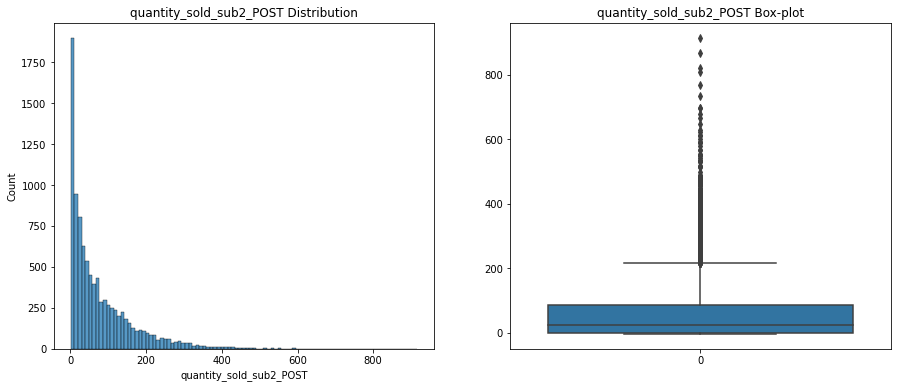

quantity_sold_sub2_POST < 0: 0.68%
quantity_sold_sub2_POST = 0: 24.74%
low outliers: 0
high outliers: 809


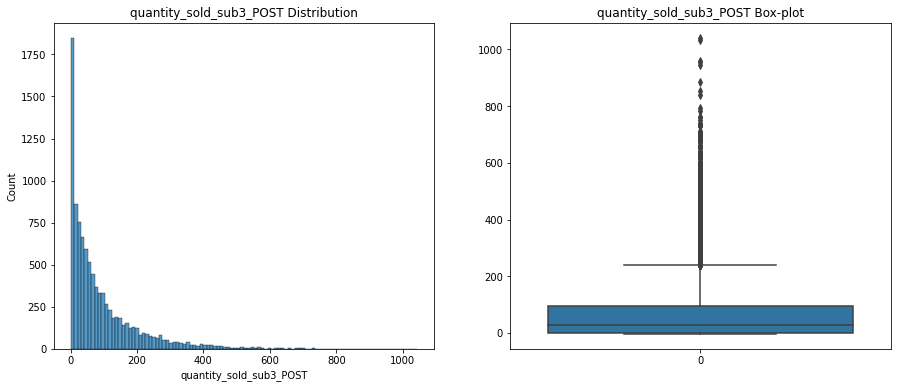

quantity_sold_sub3_POST < 0: 0.8%
quantity_sold_sub3_POST = 0: 24.03%
low outliers: 0
high outliers: 972


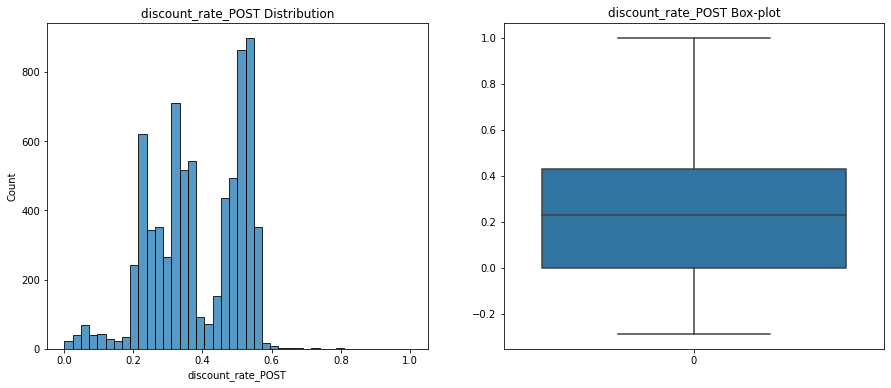

discount_rate_POST < 0: 0.02%
discount_rate_POST = 0: 43.52%
low outliers: 0
high outliers: 0


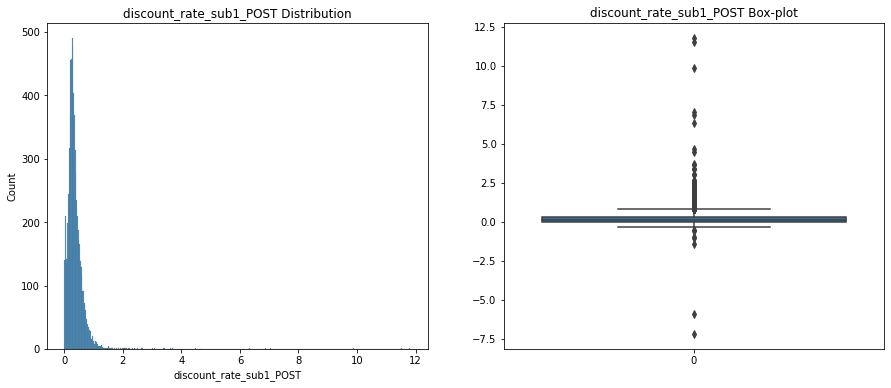

discount_rate_sub1_POST < 0: 0.22%
discount_rate_sub1_POST = 0: 44.21%
low outliers: 7
high outliers: 338


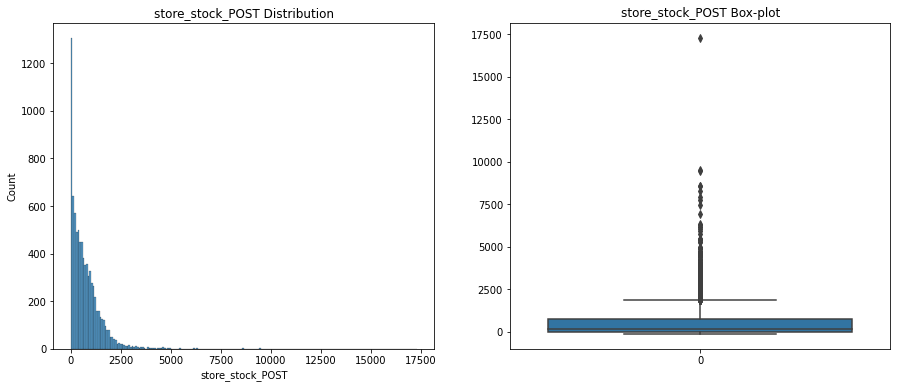

store_stock_POST < 0: 2.27%
store_stock_POST = 0: 33.41%
low outliers: 0
high outliers: 536


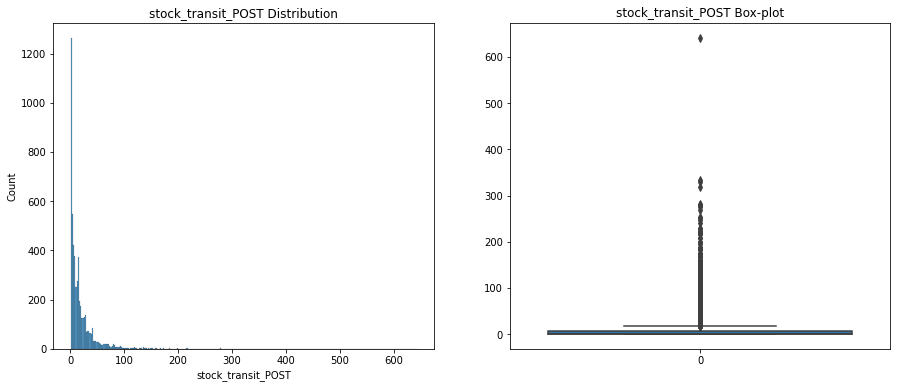

stock_transit_POST < 0: 0.0%
stock_transit_POST = 0: 58.3%
low outliers: 0
high outliers: 1770


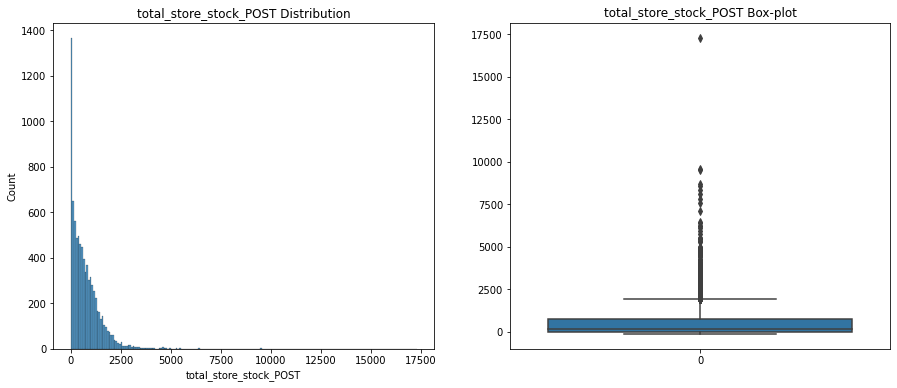

total_store_stock_POST < 0: 2.17%
total_store_stock_POST = 0: 33.1%
low outliers: 0
high outliers: 545


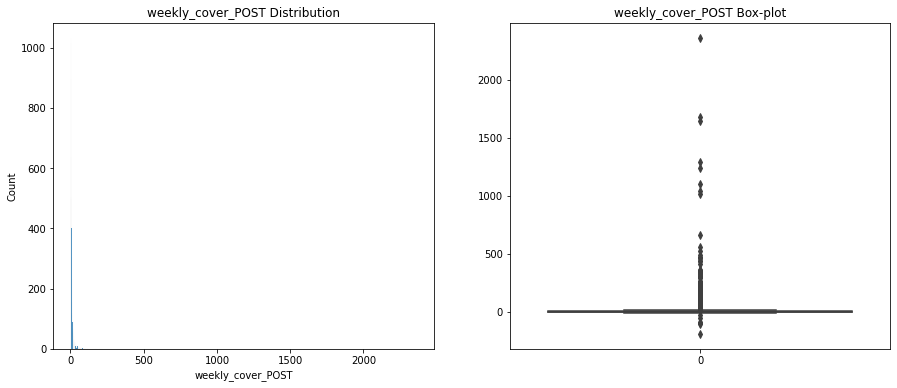

weekly_cover_POST < 0: 0.44%
weekly_cover_POST = 0: 43.59%
low outliers: 6
high outliers: 1243


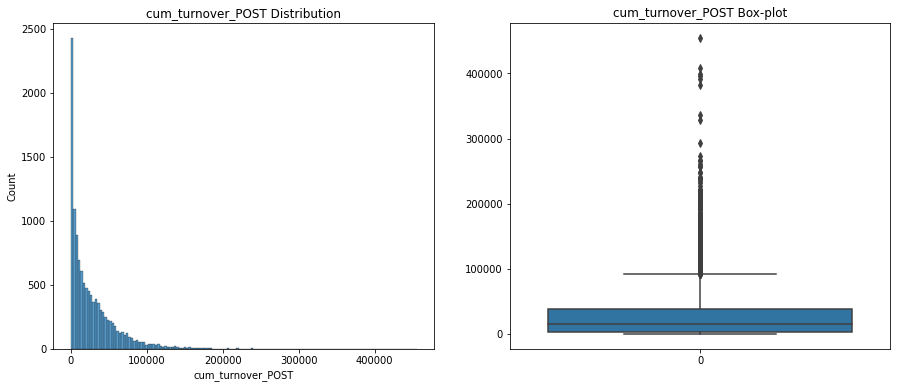

cum_turnover_POST < 0: 0.72%
cum_turnover_POST = 0: 7.09%
low outliers: 0
high outliers: 601


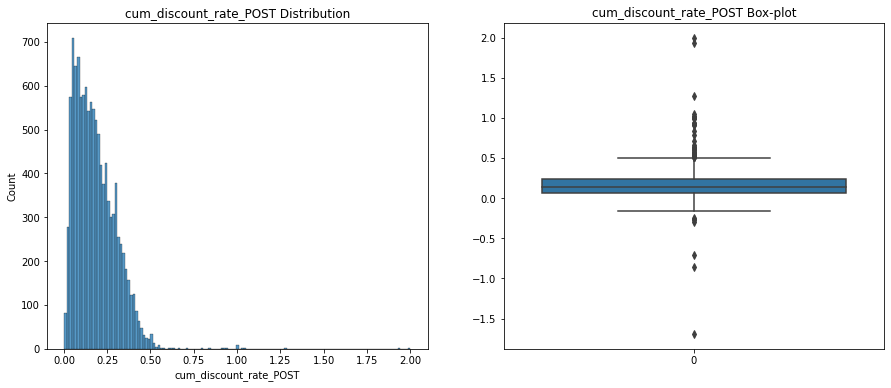

cum_discount_rate_POST < 0: 0.16%
cum_discount_rate_POST = 0: 10.3%
low outliers: 7
high outliers: 62


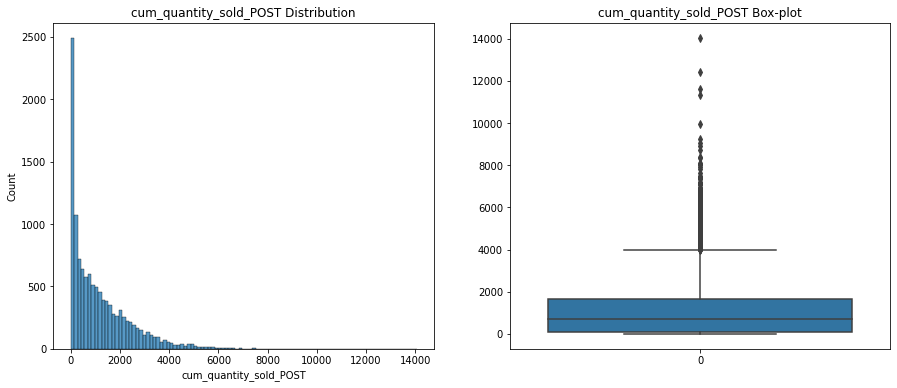

cum_quantity_sold_POST < 0: 0.62%
cum_quantity_sold_POST = 0: 7.13%
low outliers: 0
high outliers: 439


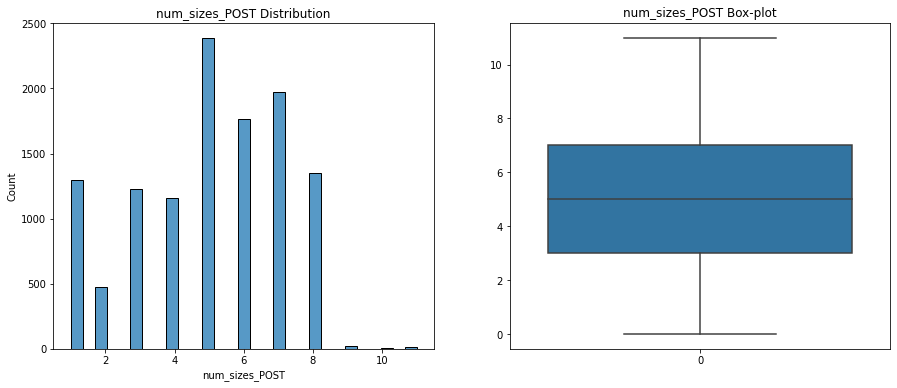

num_sizes_POST < 0: 0.0%
num_sizes_POST = 0: 9.76%
low outliers: 0
high outliers: 0


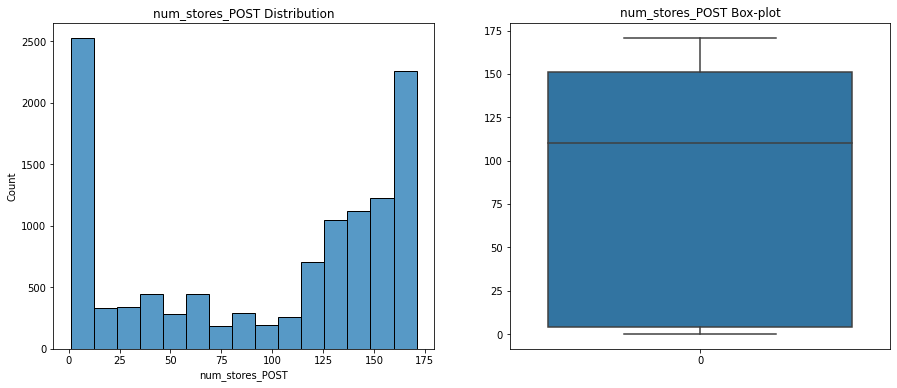

num_stores_POST < 0: 0.0%
num_stores_POST = 0: 9.76%
low outliers: 0
high outliers: 0


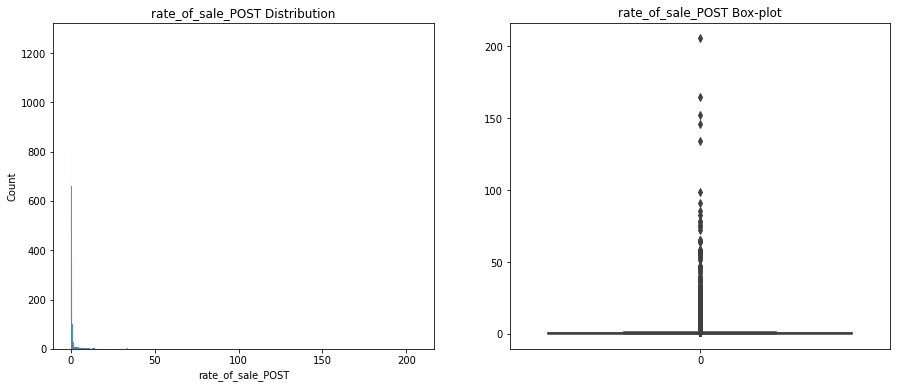

rate_of_sale_POST < 0: 0.11%
rate_of_sale_POST = 0: 10.14%
low outliers: 0
high outliers: 1202


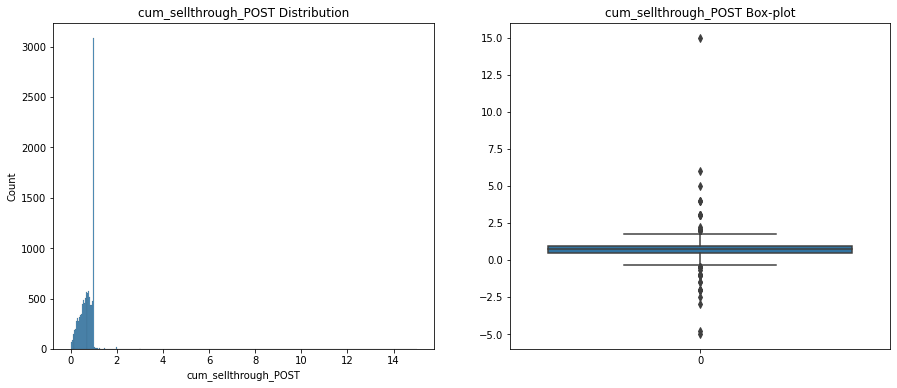

cum_sellthrough_POST < 0: 0.3%
cum_sellthrough_POST = 0: 7.95%
low outliers: 26
high outliers: 28


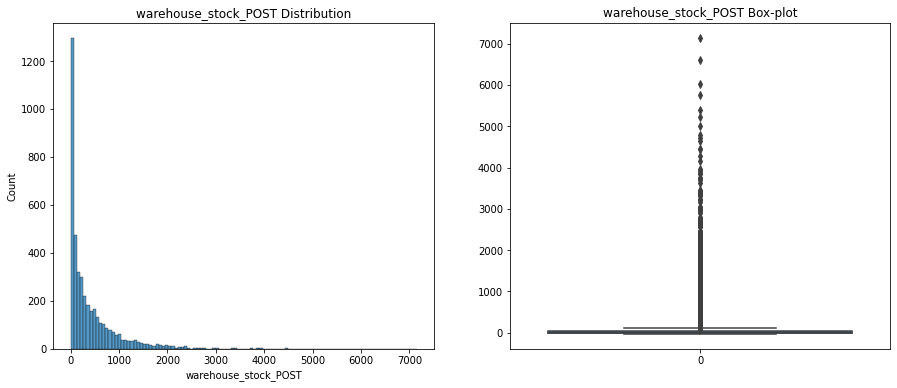

warehouse_stock_POST < 0: 4.61%
warehouse_stock_POST = 0: 62.12%
low outliers: 0
high outliers: 2609


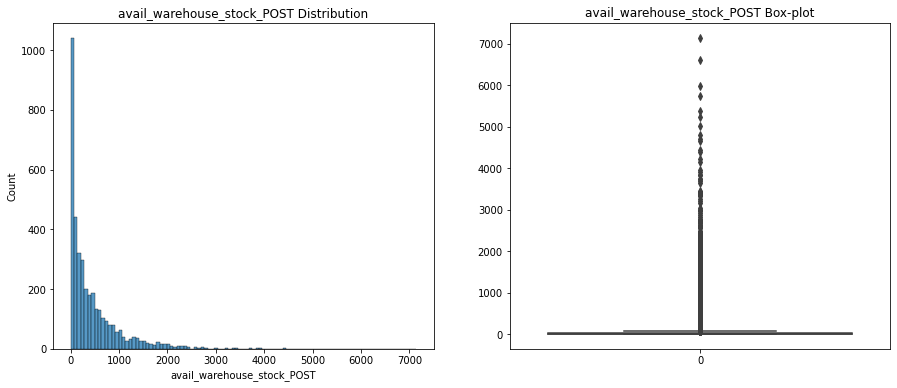

avail_warehouse_stock_POST < 0: 0.0%
avail_warehouse_stock_POST = 0: 70.08%
low outliers: 0
high outliers: 2763


In [17]:
for col in df_num_temp.columns[1:]:
    fig, ax = plt.subplots(1,2,figsize=(15,6))
    sns.histplot(x=df_num_temp[df_num_temp[col]>0][col], ax=ax[0])
    ax[0].set_title(f"{col} Distribution")
    sns.boxplot(data=df_num_temp[col], ax=ax[1])
    ax[1].set_title(f"{col} Box-plot")
    plt.show()
    neg_price_percent = str(round(df_num_temp[col][df_num_temp[col] < 0].count() / len(df) * 100,2)) + "%"
    print(f"{col} < 0:", neg_price_percent)
    zero_price_percent = str(round(df_num_temp[col][df_num_temp[col] == 0].count() / len(df) * 100,2)) + "%"
    print(f"{col} = 0:", zero_price_percent)
    Q1 = df_num_temp[[col]].quantile(0.25)[0]
    Q3 = df_num_temp[[col]].quantile(0.75)[0]
    IQR = Q3 - Q1
    low_liers = df_num_temp[[col]][df_num_temp[col] < Q1 - 1.5 * IQR].count()[0]
    print("low outliers:", low_liers)
    high_liers = df_num_temp[[col]][df_num_temp[col] > Q3 + 1.5 * IQR].count()[0]
    print("high outliers:", high_liers)